
# Module Name: SE4050 - Deep Learning Assignment:

## Group memebr details:


*  I.S.C.Dharmapriya (IT20661724)
*  B.G.C.S. Nanayakkara (IT20651138)
*  B.K Tharuka (IT20648404)
*  D.I.Weerapperuma (IT20658472)

## Customer Churn Prediction for US Mobile Operators

In this notebook, we will address a significant challenge faced by US mobile operators - customer churn. Customer churn occurs when subscribers discontinue their service with a mobile operator and switch to a competitor. Understanding and predicting churn is crucial for telecom companies to retain customers and maintain a sustainable business.

## Objective:
The primary goal of this assignment is to leverage deep learning techniques to develop a predictive model for customer churn based on historical records and data. By analyzing patterns and trends in customer behavior, we aim to create a model that can identify customers at risk of churning. This predictive model will enable the mobile operator to take proactive measures to retain valuable customers.

## Data Source:
The dataset used for this assignment contains historical records of customer interactions, including call data, customer information, and subscription details. The data is based on real-world data published on the internet and is a representative sample of customer behavior.

## Approach:
To achieve the objective, we will implement various deep learning algorithms and techniques. This includes preprocessing and feature engineering, building neural network architectures, and evaluating model performance.

## Key Steps:

Data Preprocessing: We will clean and preprocess the dataset, handling missing

1.  Values and transforming categorical variables into a suitable format for deep learning.

2.   Feature Engineering: We will identify relevant features and create new ones if necessary to enhance the predictive power of our model.

3. Model Building: Using the Keras deep learning framework, we will construct neural network models. Multiple models will be explored to compare their performance.

4. Model Evaluation: We will assess the models' performance using appropriate metrics and visualization techniques. This will help us identify the most effective model for customer churn prediction.










In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import os
import sys
import time
import json
import re
from IPython.display import display
from time import strftime, gmtime

from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, KBinsDiscretizer, LabelEncoder
from sklearn.compose import ColumnTransformer

# Data Visualization

In [2]:
# Output columns
columns = ["Churn?", "State", "Account Length", "Area Code", "Int'l Plan",
           "VMail Plan", "VMail Message", "Day Mins", "Day Calls",
           "Eve Mins", "Eve Calls",
           "Night Mins", "Night Calls",
           "Intl Mins", "Intl Calls",
           "CustServ Calls"]

In [3]:
#import the dataset
df = pd.read_csv('/content/churn.csv')
pd.set_option('display.max_columns', 30)

In [4]:
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [5]:
#datatypes of each feature
df.dtypes

State              object
Account Length      int64
Area Code           int64
Phone              object
Int'l Plan         object
VMail Plan         object
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
Churn?             object
dtype: object

In [6]:
#Descriptive statistics
df.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [7]:
# Frequency tables for each categorical feature
for column in df.select_dtypes(include=['object']).columns:
    display(pd.crosstab(index=df[column], columns='Frequency', normalize='columns'))

col_0,Frequency
State,
AK,0.015602
AL,0.024002
AR,0.016502
AZ,0.019202
CA,0.010201
CO,0.019802
CT,0.022202
DC,0.016202
DE,0.018302


col_0,Frequency
Phone,
327-1058,0.0003
327-1319,0.0003
327-3053,0.0003
327-3587,0.0003
327-3850,0.0003
...,...
422-7728,0.0003
422-8268,0.0003
422-8333,0.0003


col_0,Frequency
Int'l Plan,
no,0.90309
yes,0.09691


col_0,Frequency
VMail Plan,
no,0.723372
yes,0.276628


col_0,Frequency
Churn?,
False.,0.855086
True.,0.144914


# Immediate observations
- State appears to be quite evenly distributed
- Phone takes on too many unique values to be of any practical use. It's possible parsing out the prefix could have some value, but without more context on how these are allocated, we should avoid using it.
- Only 14% of customers churned, so there is some class imabalance, but nothing extreme.
- Most of the numeric features are surprisingly nicely distributed, with many showing bell-like gaussianity. VMail Message being a notable exception (and Area Code showing up as a feature we should convert to non-numeric).

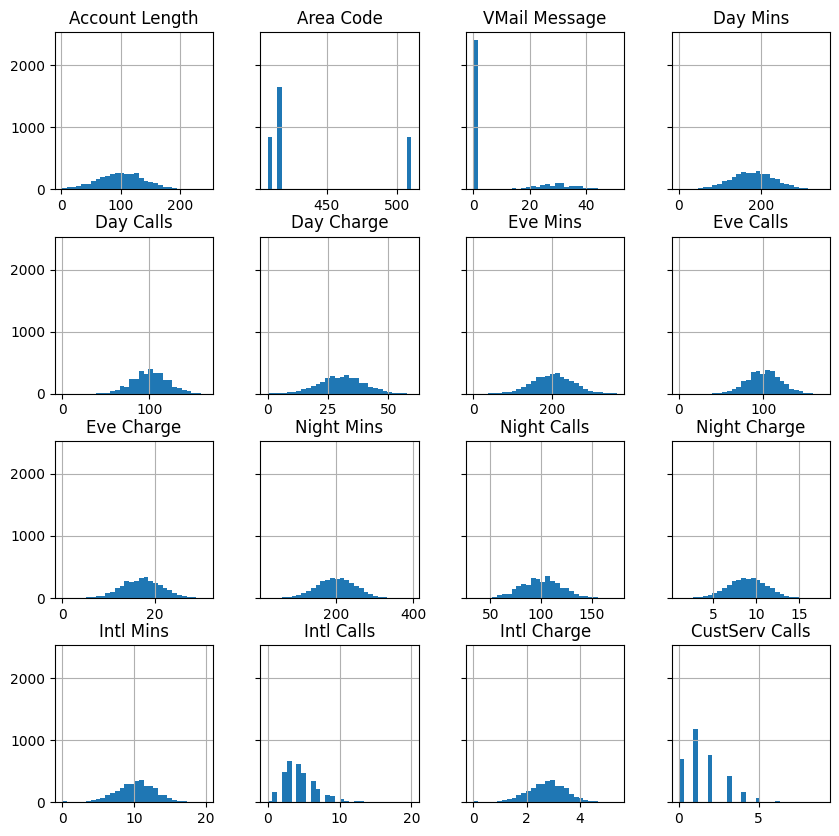

In [8]:
# Histograms for each numeric features
hist = df.hist(bins=30, sharey=True, figsize=(10, 10))


In [9]:
#Removing phone number column as it does not affect the churn
df.drop(columns=['Phone'], inplace=True)
#Converting area code from int to obejct type to reflect categorial nature
df['Area Code'] = df['Area Code'].astype(object)

In [10]:
#Contingency table between label and categorical features
for column in df.select_dtypes(include=['object']).columns:
    if column != 'Churn?':
        display(pd.crosstab(index=df[column], columns=df['Churn?'], normalize='columns'))

Churn?,False.,True.
State,,
AK,0.017193,0.006211
AL,0.025263,0.016563
AR,0.015439,0.022774
AZ,0.021053,0.008282
CA,0.008772,0.018634
CO,0.020000,0.018634
CT,0.021754,0.024845
DC,0.017193,0.010352
DE,0.018246,0.018634


Churn?,False.,True.
Area Code,,
408,0.251228,0.252588
415,0.497895,0.488613
510,0.250877,0.258799


Churn?,False.,True.
Int'l Plan,,
no,0.934737,0.716356
yes,0.065263,0.283644


Churn?,False.,True.
VMail Plan,,
no,0.704561,0.834369
yes,0.295439,0.165631


Account Length


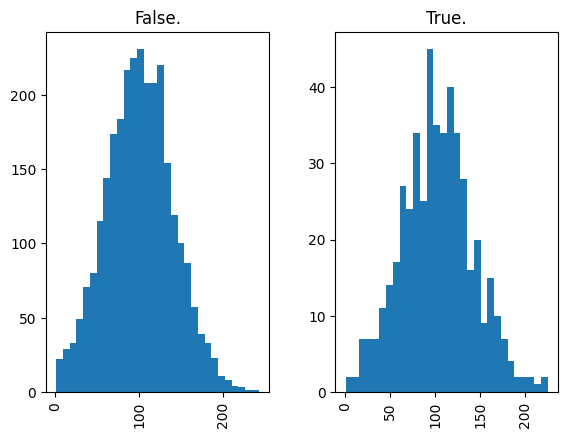

VMail Message


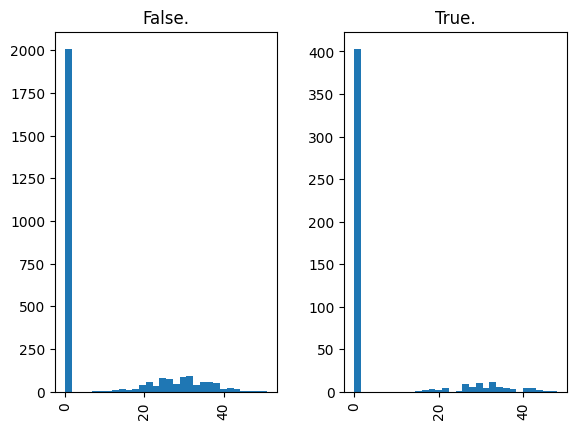

Day Mins


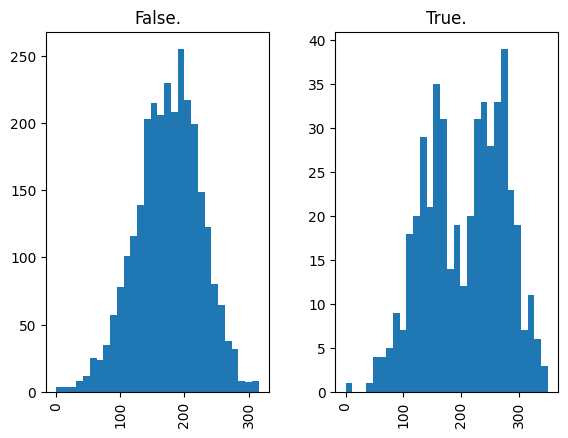

Day Calls


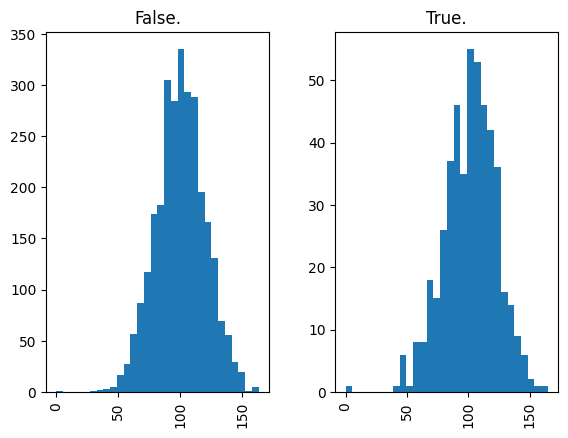

Day Charge


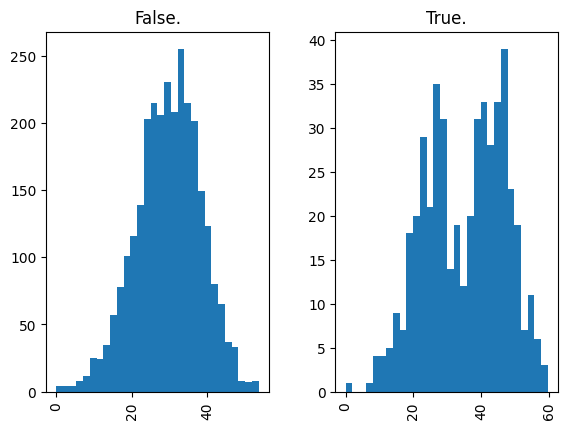

Eve Mins


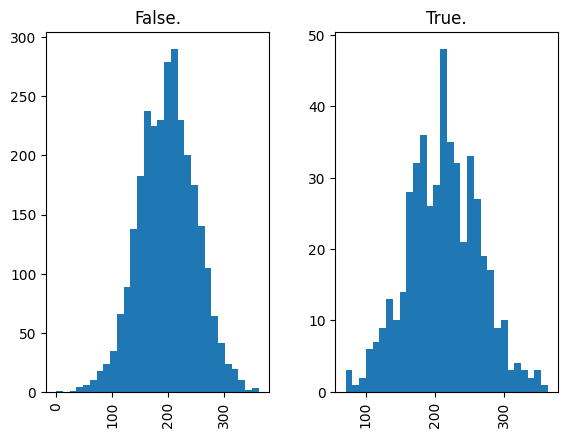

Eve Calls


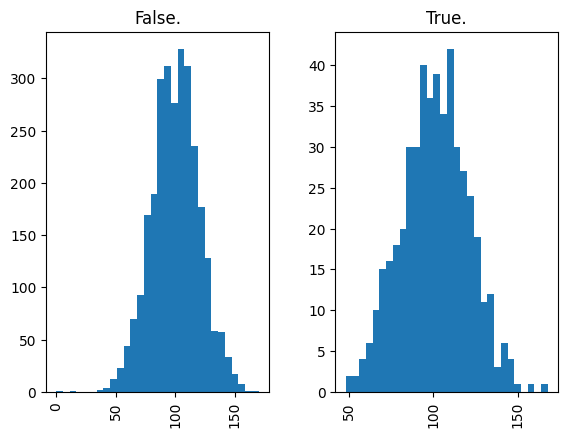

Eve Charge


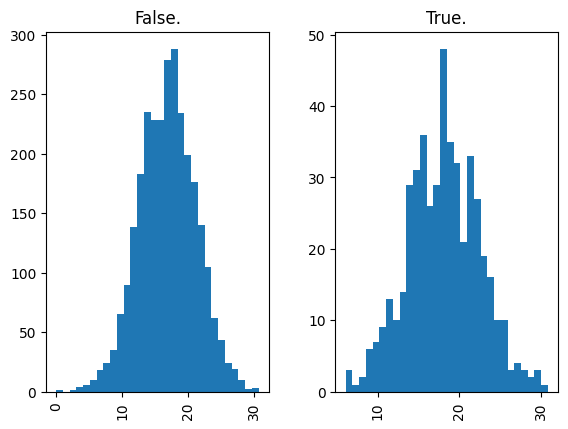

Night Mins


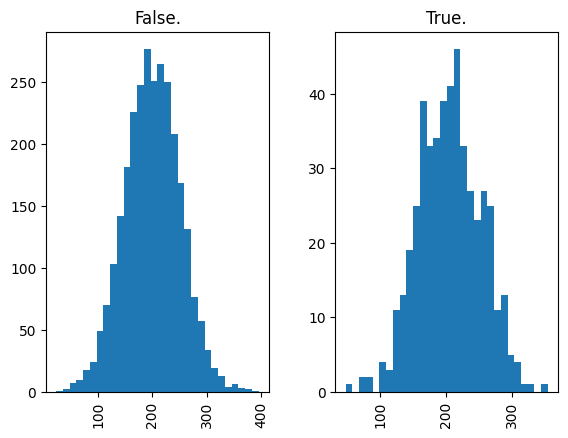

Night Calls


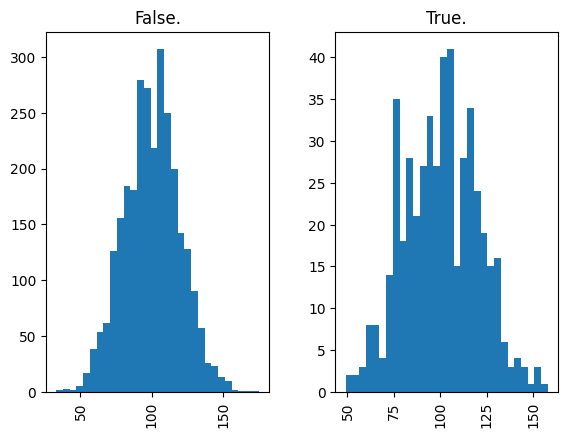

Night Charge


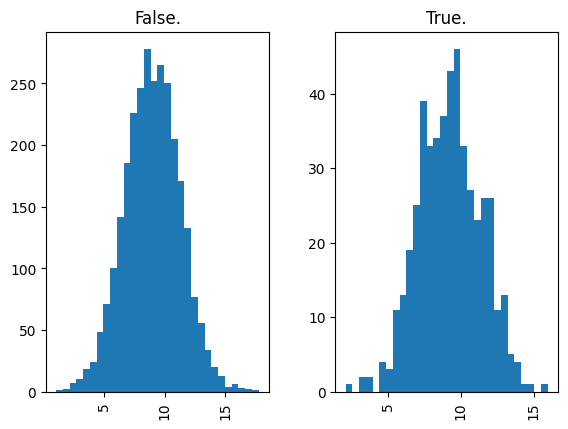

Intl Mins


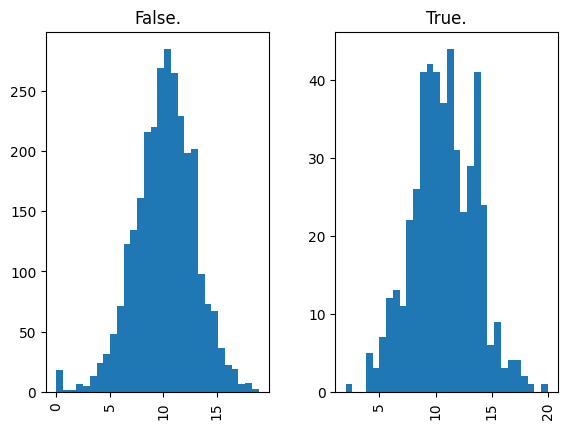

Intl Calls


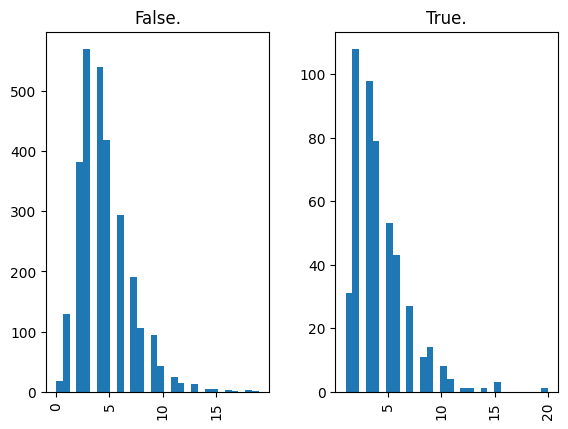

Intl Charge


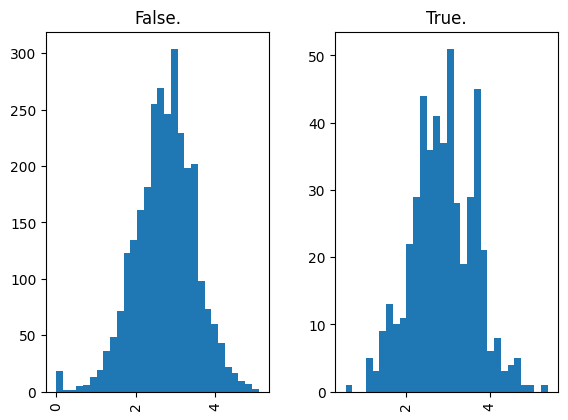

CustServ Calls


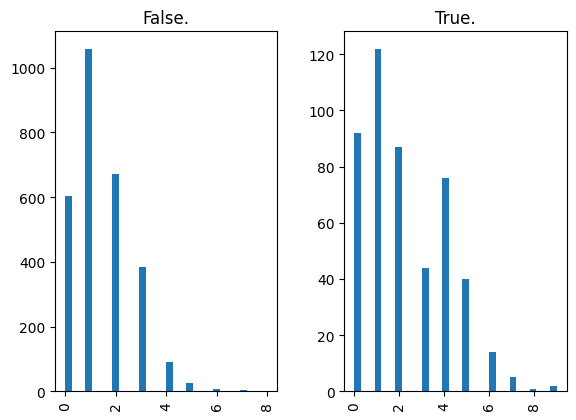

In [11]:
#Visualizing above relationships
for column in df.select_dtypes(exclude=['object']).columns:
    print(column)
    hist = df[[column, 'Churn?']].hist(by='Churn?', bins=30)
    plt.show()

In [12]:
#Observing correlation between numerical features
display(df.corr())

<ipython-input-12-f50eb6559be2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  display(df.corr())


,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
Account Length,1.000000,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796
VMail Message,-0.004628,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263
Day Mins,0.006216,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423
Day Calls,0.038470,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942
Day Charge,0.006214,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427
Eve Mins,-0.006757,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985
Eve Calls,0.019260,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423
Eve Charge,-0.006745,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987
Night Mins,-0.008955,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288
Night Calls,-0.013176,0.007123,0.022972,-0.019557,0.022972,0.007586,0.007710,0.007596,0.011204,1.000000,0.011188,-0.013605,0.000305,-0.013630,-0.012802


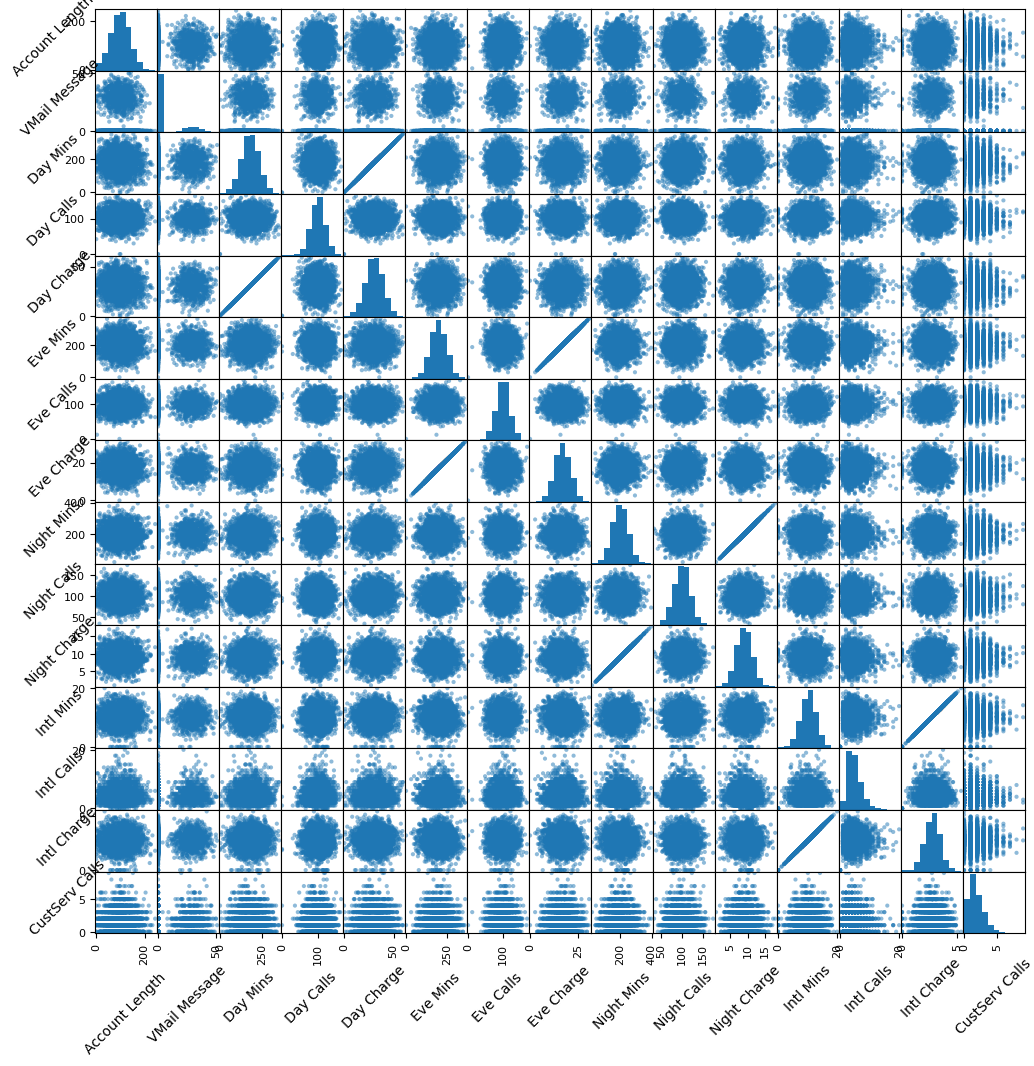

In [13]:
#Visualizing through a scatter plot matrix
scatter_matrix = pd.plotting.scatter_matrix(df, figsize=(12, 12))

for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 10, rotation = 45)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 10, rotation = 45)

plt.show()

There are several feature which have almost 100% correlation these should be removed before proceeding.

In [14]:
# Drop columns that are highly correlated with other columns
df.drop(columns=['Day Charge', 'Eve Charge', 'Night Charge', 'Intl Charge'], inplace=True)

# Missing value resolution

In [15]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
State,0,0.0
Account Length,0,0.0
Area Code,0,0.0
Int'l Plan,0,0.0
VMail Plan,0,0.0
VMail Message,0,0.0
Day Mins,0,0.0
Day Calls,0,0.0
Eve Mins,0,0.0
Eve Calls,0,0.0


As there are no missing value there is no need for further exploration

#### Label encoding categorical variables

In [16]:
state_list = ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
churn_list = ['False.', 'True.']
plans = ['no', 'yes']

In [17]:
# Encode Class Labels to integers
state_le = LabelEncoder()
state_le.fit(state_list)

churn_le = LabelEncoder()
churn_le.fit(churn_list)

plans_le = LabelEncoder()
plans_le.fit(plans)

LabelEncoder()

In [18]:
df.head()

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Eve Mins,Eve Calls,Night Mins,Night Calls,Intl Mins,Intl Calls,CustServ Calls,Churn?
0,KS,128,415,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False.
1,OH,107,415,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False.
2,NJ,137,415,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False.
3,OH,84,408,yes,no,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False.
4,OK,75,415,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False.


In [19]:
# Encode specific columns
df['State'] = state_le.transform(df['State'])
df['Churn?'] = churn_le.transform(df['Churn?'])
df["Int'l Plan"] = plans_le.transform(df["Int'l Plan"])
df["VMail Plan"] = plans_le.transform(df["VMail Plan"])

In [20]:
df.head()

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Eve Mins,Eve Calls,Night Mins,Night Calls,Intl Mins,Intl Calls,CustServ Calls,Churn?
0,16,128,415,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0
1,35,107,415,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0
2,31,137,415,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0
3,35,84,408,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0
4,36,75,415,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0


In [21]:
df.tail()

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Eve Mins,Eve Calls,Night Mins,Night Calls,Intl Mins,Intl Calls,CustServ Calls,Churn?
3328,3,192,415,0,1,36,156.2,77,215.5,126,279.1,83,9.9,6,2,0
3329,49,68,415,0,0,0,231.1,57,153.4,55,191.3,123,9.6,4,3,0
3330,39,28,510,0,0,0,180.8,109,288.8,58,191.9,91,14.1,6,2,0
3331,6,184,510,1,0,0,213.8,105,159.6,84,139.2,137,5.0,10,2,0
3332,42,74,415,0,1,25,234.4,113,265.9,82,241.4,77,13.7,4,0,0


In [22]:
df.shape

(3333, 16)

### Additional data transformation adn standardization

In [23]:
# All other categorical features need to be
categorical_features =['State',"Int'l Plan","VMail Plan",'Area Code']

numeric_features = ['Account Length','VMail Message',
                    'Day Mins','Day Calls','Eve Mins','Eve Calls','Night Mins','Night Calls',
                   'Intl Mins','Intl Calls','CustServ Calls']

categorical_features + numeric_features

['State',
 "Int'l Plan",
 'VMail Plan',
 'Area Code',
 'Account Length',
 'VMail Message',
 'Day Mins',
 'Day Calls',
 'Eve Mins',
 'Eve Calls',
 'Night Mins',
 'Night Calls',
 'Intl Mins',
 'Intl Calls',
 'CustServ Calls']

In [24]:
colTransformer = ColumnTransformer([('onehot',
                                     OneHotEncoder(categories='auto',sparse=False),
                                     categorical_features),
                                    ('standardize',
                                    StandardScaler(),numeric_features)
                                   ],
                                   remainder="passthrough")

In [25]:
colTransformer.fit(df[categorical_features + numeric_features])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(sparse=False),
                                 ['State', "Int'l Plan", 'VMail Plan',
                                  'Area Code']),
                                ('standardize', StandardScaler(),
                                 ['Account Length', 'VMail Message', 'Day Mins',
                                  'Day Calls', 'Eve Mins', 'Eve Calls',
                                  'Night Mins', 'Night Calls', 'Intl Mins',
                                  'Intl Calls', 'CustServ Calls'])])

In [26]:
train_data, validation_data, test_data = np.split(df.sample(frac=1, random_state=1729),
                                                  [int(0.7 * len(df)), int(0.9 * len(df))])

In [27]:
print(train_data.shape,validation_data.shape,test_data.shape)

(2333, 16) (666, 16) (334, 16)


In [28]:
train_data[columns].head()

,Churn?,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Eve Mins,Eve Calls,Night Mins,Night Calls,Intl Mins,Intl Calls,CustServ Calls
1095,0,13,106,510,0,0,0,274.4,120,198.6,82,160.8,62,6.0,3,1
608,0,50,28,415,0,0,0,187.8,94,248.6,86,208.8,124,10.6,5,0
2908,1,33,148,415,0,0,0,279.3,104,201.6,87,280.8,99,7.9,2,2
943,0,37,132,510,0,0,0,191.9,107,206.9,127,272.0,88,12.6,2,1
693,0,31,92,510,0,1,29,155.4,110,188.5,104,254.9,118,8.0,4,3


In [29]:
#column transformation using coltransform from sklearn
train_data_transformed = colTransformer.transform (train_data[categorical_features + numeric_features])

validation_data_transformed = colTransformer.transform (validation_data[categorical_features + numeric_features])

test_data_transformed = colTransformer.transform (test_data[categorical_features + numeric_features])

In [30]:
print(train_data_transformed.shape, validation_data_transformed.shape, test_data_transformed.shape)

(2333, 69) (666, 69) (334, 69)


In [31]:
train_data['Churn?'].values

array([0, 0, 1, ..., 0, 0, 0])

# Concatenating label to transformed data

In [32]:
train_data_transformed = np.concatenate((np.array([train_data['Churn?']]).T, train_data_transformed),axis=1)

validation_data_transformed = np.concatenate((np.array([validation_data['Churn?']]).T, validation_data_transformed),axis=1)

test_data_transformed = np.concatenate((np.array([test_data['Churn?']]).T, test_data_transformed),axis=1)

In [33]:
print(train_data_transformed.shape, validation_data_transformed.shape, test_data_transformed.shape)

(2333, 70) (666, 70) (334, 70)


In [34]:
#viewing first column of transformed data
train_data_transformed[:1]

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.1239496 ,
        -0.59175986,  1.73753694,  0.97499676, -0.04694389, -0.90936958,
        -0.79246592, -1.94768203, -1.5179703 , -0.6

In [35]:
# Write Training Set
np.savetxt('train_onehot.csv',train_data_transformed,delimiter=",",fmt='%.5f')

In [36]:
# Write Validation Set
np.savetxt('validation_onehot.csv',validation_data_transformed,delimiter=",",fmt='%.5f')

In [37]:
# Write Test Set
np.savetxt('test_onehot.csv',test_data_transformed,delimiter=",",fmt='%.5f')

### Storing original format for ease of assessing performance

In [38]:
# Write Training Set
train_data.to_csv('train.csv'
                          ,index=False,header=False
                          ,columns=columns)

In [39]:
# Write Validation Set
validation_data.to_csv('validation.csv'
                          ,index=False,header=False
                          ,columns=columns)

In [40]:
# Write Test Set
test_data.to_csv('test.csv'
                          ,index=False,header=False
                          ,columns=columns)

In [41]:
# Write Column List
with open('column_list.txt','w') as f:
    f.write(','.join(columns))

# Building MLP model usng tensorflow an Keras

In [42]:
import sys
import numpy as np
# Set random seed
np.random.seed(0)

import pandas as pd
import matplotlib.pyplot as plt
import itertools

from sklearn.metrics import classification_report, confusion_matrix

# Column Transformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, KBinsDiscretizer

# Keras Library
from keras.models import Sequential
from keras.layers import Dense, Activation

#user-defined function for model evaluation
from confusion_matrix_plotter import plot_confusion_matrix
from metrics_calculator import binary_classifier_metrics

In [43]:
train_file = 'train_onehot.csv'
validation_file = 'validation_onehot.csv'
test_file = 'test_onehot.csv'

In [44]:
df_train = pd.read_csv(train_file, header=None)
df_validation = pd.read_csv(validation_file, header=None)
df_test = pd.read_csv(test_file, header=None)

In [45]:
df_train.shape

(2333, 70)

In [46]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,...,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.12395,-0.59176,1.73754,0.97500,-0.04694,-0.90937,-0.79247,-1.94768,-1.51797,-0.60120,-0.42793
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,-1.83506,-0.59176,0.14736,-0.32072,0.93913,-0.70856,0.15678,1.22113,0.12994,0.21153,-1.18822
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.17880,-0.59176,1.82751,0.17763,0.01222,-0.65836,1.58066,-0.05662,-0.83731,-1.00756,0.33235
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.77695,-0.59176,0.22264,0.32714,0.11674,1.34971,1.40663,-0.61882,0.84642,-1.00756,-0.42793
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,-0.22767,1.52715,-0.44758,0.47664,-0.24613,0.19507,1.06846,0.91447,-0.80149,-0.19483,1.09264


In [47]:
df_train.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,...,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69
2328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.12395,-0.59176,0.27589,1.62286,0.24493,-1.36119,-0.19918,-0.41438,0.45235,1.02426,-1.18822
2329,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.60114,-0.59176,-0.67161,-1.01842,-2.22616,-0.30695,0.63932,1.78334,-0.51490,1.02426,1.85293
2330,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.70160,-0.59176,-0.66242,0.67598,1.90942,-0.10614,0.23193,-0.72104,0.41653,1.43063,1.85293
2331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.45507,-0.59176,0.34934,0.32714,-0.10808,-0.45755,0.24578,1.01669,2.24356,1.02426,2.61321
2332,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,-0.05186,1.81941,-0.01240,-0.37056,0.73600,0.09466,-0.69556,-0.20994,0.12994,-1.41392,0.33235


In [73]:
df_validation.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,...,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,-1.35786,1.45408,-0.70649,-0.32072,-0.65042,0.39588,-1.72787,-0.82326,-0.87314,-1.00756,-0.42793
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,-1.78482,-0.59176,1.24175,0.32714,-0.49462,-1.21058,1.71118,-0.51660,0.38070,-1.00756,-1.18822
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.12395,1.74634,-0.25478,1.27401,0.30607,-0.35715,-0.54922,-0.72104,1.38378,1.43063,1.85293
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.75184,-0.59176,1.12240,0.37697,-0.66225,-0.45755,2.39939,0.45448,1.59872,1.43063,1.09264
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,-0.45371,2.11167,-1.85965,0.42681,0.18774,0.04446,-0.41870,0.09671,0.55982,-0.19483,-0.42793


In [74]:
df_validation.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,...,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69
661,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.92764,-0.59176,-0.96724,0.07796,0.92138,0.29547,0.13503,-1.28325,-1.87621,-0.60120,1.09264
662,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.47557,-0.59176,1.32622,0.97500,-1.00146,0.29547,-0.97045,-0.20994,-0.22830,-1.41392,0.33235
663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.27464,1.60021,-2.18834,0.62615,-0.69183,-0.20655,-1.34619,-0.05662,1.09719,1.02426,-1.18822
664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,-0.78021,-0.59176,0.32180,-0.47023,2.06719,-0.95957,-0.59075,0.25004,-1.26720,0.61790,-0.42793
665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,-0.50394,2.76926,-0.21071,1.17434,1.37892,0.14487,0.42772,-0.10772,-1.26720,-1.00756,1.85293


In [75]:
df_test.head()

,Churn?,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Eve Mins,Eve Calls,Night Mins,Night Calls,Intl Mins,Intl Calls,CustServ Calls,predicted_prob,predicted_class
0,0,16,186,510,0,0,0,137.8,97,187.7,118,146.4,85,8.7,6,1,0.003248,0
1,0,19,132,415,0,1,25,113.2,96,269.9,107,229.1,87,7.1,7,2,0.017538,0
2,0,19,112,415,0,1,17,183.2,95,252.8,125,156.7,95,9.7,3,0,0.022273,0
3,0,9,91,510,1,1,24,93.5,112,183.4,128,240.7,133,9.9,3,0,0.313428,0
4,0,40,22,408,0,0,0,110.3,107,166.5,93,202.3,96,9.5,5,0,0.002864,0


In [76]:
df_test.tail()

,Churn?,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Eve Mins,Eve Calls,Night Mins,Night Calls,Intl Mins,Intl Calls,CustServ Calls,predicted_prob,predicted_class
329,0,21,59,510,0,0,0,166.3,95,239.3,87,123.2,108,10.0,3,2,0.012678,0
330,0,3,127,415,0,1,14,143.2,99,169.9,91,221.6,77,11.6,1,1,0.006818,0
331,0,15,86,415,0,0,0,166.2,112,255.3,81,228.1,97,5.4,7,1,0.005961,0
332,0,40,36,408,0,1,43,29.9,123,129.1,117,325.9,105,8.6,6,2,0.171452,0
333,0,16,123,415,0,0,0,163.1,119,249.4,51,168.2,77,9.0,10,1,0.003677,0


In [48]:
# features and labels for training data
X_train = df_train.iloc[:,1:]
y_train = df_train.iloc[:,0].ravel()

# features and labels for validation data
X_validation = df_validation.iloc[:,1:]
y_validation = df_validation.iloc[:,0].ravel()

# features and labels for test data
X_test = df_test.iloc[:,1:]
y_test = df_test.iloc[:,0].ravel()

# Building four models with Keras sequential model

## Model 1
### Model Architecture:

**Neural Network Type**: Sequential Model

**Layer 1:**

- Type: Dense Layer
- Number of Neurons: 30
- Activation Function: Rectified Linear Unit (ReLU)
- Input Dimension: Determined by the number of features in the input data (X_train.shape[1])

**Layer 2:**

- Type: Dense Layer
- Number of Neurons: 1
- Activation Function: Sigmoid (for binary classification)
Model Compilation:

**Optimizer:** RMSprop

**Loss Function:** Binary Cross-Entropy (suitable for binary classification tasks)

**Metrics:** Accuracy (used to evaluate model performance)

**EarlyStopping:**
To mitigate overfitting, EarlyStopping is employed during training.
It monitors the validation loss (mode set to 'min') and halts training if the loss does not improve for a specified number of epochs (patience=2).
The process is verbose, providing updates on training progress.

In [49]:
model = Sequential()

In [50]:
model.add(Dense(30, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [51]:
####Using EarlyStopping to reduce overfitting
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

In [52]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32,
         validation_data=(X_validation,y_validation),callbacks=[early_stopping])

Epoch 1/20
73/73 [==============================] - 1s 7ms/step - loss: 0.4616 - accuracy: 0.8457 - val_loss: 0.4139 - val_accuracy: 0.8348
Epoch 2/20
73/73 [==============================] - 0s 3ms/step - loss: 0.3637 - accuracy: 0.8607 - val_loss: 0.3835 - val_accuracy: 0.8378
Epoch 3/20
73/73 [==============================] - 0s 3ms/step - loss: 0.3368 - accuracy: 0.8616 - val_loss: 0.3630 - val_accuracy: 0.8453
Epoch 4/20
73/73 [==============================] - 0s 3ms/step - loss: 0.3175 - accuracy: 0.8688 - val_loss: 0.3523 - val_accuracy: 0.8453
Epoch 5/20
73/73 [==============================] - 0s 3ms/step - loss: 0.3018 - accuracy: 0.8740 - val_loss: 0.3442 - val_accuracy: 0.8559
Epoch 6/20
73/73 [==============================] - 0s 3ms/step - loss: 0.2893 - accuracy: 0.8736 - val_loss: 0.3384 - val_accuracy: 0.8574
Epoch 7/20
73/73 [==============================] - 0s 4ms/step - loss: 0.2783 - accuracy: 0.8791 - val_loss: 0.3348 - val_accuracy: 0.8694
Epoch 8/20
73/73 [==

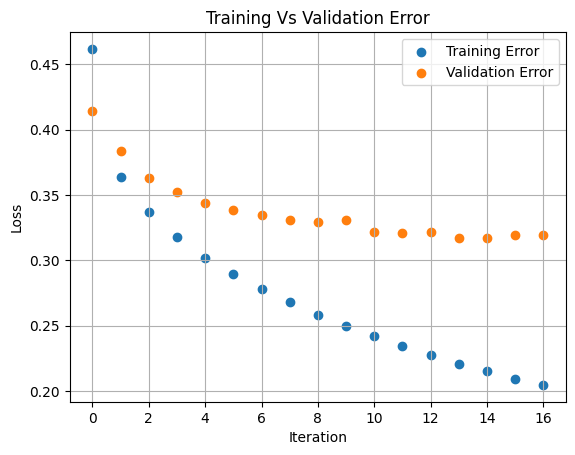

In [53]:
plt.scatter(x=history.epoch,y=history.history['loss'],label='Training Error')
plt.scatter(x=history.epoch,y=history.history['val_loss'],label='Validation Error')
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Vs Validation Error')
plt.legend()
plt.show()

In [54]:
# Predicts a binary outcome for each observation
result = model.predict(X_test)

11/11 [==============================] - 0s 2ms/step


In [55]:
result[:10]

array([[0.01041991],
       [0.02153568],
       [0.01736726],
       [0.05698793],
       [0.00877691],
       [0.02138076],
       [0.7244609 ],
       [0.02272339],
       [0.7632851 ],
       [0.02073302]], dtype=float32)

In [56]:
column_list_file = 'column_list.txt'
test_file = 'test.csv'

In [57]:
columns = ''
with open(column_list_file,'r') as f:
    columns = f.read().split(',')

In [58]:
df_test = pd.read_csv(test_file,names=columns)
df_test['predicted_prob'] = result
df_test['predicted_class'] = np.where(result > 0.5,1,0)
df_test[['Churn?','predicted_class', 'predicted_prob']].head(10)

,Churn?,predicted_class,predicted_prob
0,0,0,0.010420
1,0,0,0.021536
2,0,0,0.017367
3,0,0,0.056988
4,0,0,0.008777
5,0,0,0.021381
6,1,1,0.724461
7,0,0,0.022723
8,0,1,0.763285
9,0,0,0.020733


# Binary Classifier Metrics

In [59]:
cnf_matrix = confusion_matrix(df_test['Churn?'], df_test['predicted_class'],labels=[1,0])

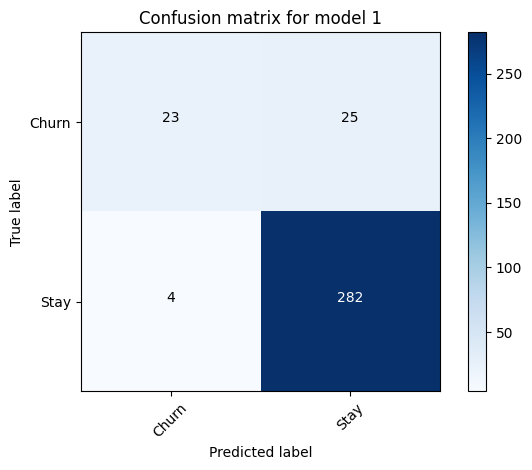

In [60]:
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=['Churn','Stay'],
                      title='Confusion matrix for model 1')

In [61]:
metrics = [binary_classifier_metrics(df_test['Churn?'], df_test['predicted_class'])]
df_metrics=pd.DataFrame.from_dict(metrics)
df_metrics.index = ['Model 1']

In [62]:
df_metrics

,TruePositive,TrueNegative,FalsePositive,FalseNegative,Positive,Negative,Recall,TrueNegativeRate,Precision,Accuracy,FalsePositiveRate,FalseNegativeRate,F1
Model 1,23,282,4,25,48,286,0.479167,0.986014,0.851852,0.913174,0.013986,0.520833,0.613333


# Model 2

### Model Architecture:

**Neural Network Type**: Sequential Model

**Layer 1:**

- Type: Dense Layer
- Number of Neurons: 20
- Activation Function: Rectified Linear Unit (ReLU)
- Input Dimension: Determined by the number of features in the input data (X_train.shape[1])

**Layer 2:**

- Type: Dense Layer
- Number of Neurons: 20
- Activation Function: Rectified Linear Unit (ReLU)
- Input Dimension: Determined by the number of features in the input data (X_train.shape[1])

**Layer 3:**

- Type: Dense Layer
- Number of Neurons: 20
- Activation Function: Rectified Linear Unit (ReLU)
- Input Dimension: Determined by the number of features in the input data (X_train.shape[1])

**Layer 4: Output layer**

- Type: Dense Layer
- Number of Neurons: 1
- Activation Function: Sigmoid (for binary classification)

**Model Compilation:**

- **Optimizer:** RMSprop
- **Loss Function:** Binary Cross-Entropy (suitable for binary classification tasks)
- **Metrics:** Accuracy (used to evaluate model performance)

**EarlyStopping:**

- To mitigate overfitting, EarlyStopping is employed during training.
- It monitors the validation loss (mode set to 'min') and halts training if the loss does not improve for a specified number of epochs (patience=2).
- The process is verbose, providing updates on training progress.


In [63]:
model2=Sequential()
model2.add(Dense(20, activation='relu', input_dim=X_train.shape[1]))
model2.add(Dense(20, activation='relu', input_dim=X_train.shape[1]))
model2.add(Dense(20, activation='relu', input_dim=X_train.shape[1]))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [64]:
history_for_model2 = model2.fit(X_train, y_train, epochs=20, batch_size=32,
         validation_data=(X_validation,y_validation),callbacks=[early_stopping])

Epoch 1/20
73/73 [==============================] - 1s 9ms/step - loss: 0.4489 - accuracy: 0.8607 - val_loss: 0.4339 - val_accuracy: 0.8348
Epoch 2/20
73/73 [==============================] - 0s 5ms/step - loss: 0.3751 - accuracy: 0.8607 - val_loss: 0.4027 - val_accuracy: 0.8348
Epoch 3/20
73/73 [==============================] - 0s 5ms/step - loss: 0.3446 - accuracy: 0.8607 - val_loss: 0.3748 - val_accuracy: 0.8393
Epoch 4/20
73/73 [==============================] - 0s 5ms/step - loss: 0.3158 - accuracy: 0.8641 - val_loss: 0.3649 - val_accuracy: 0.8438
Epoch 5/20
73/73 [==============================] - 0s 5ms/step - loss: 0.2903 - accuracy: 0.8731 - val_loss: 0.3411 - val_accuracy: 0.8514
Epoch 6/20
73/73 [==============================] - 0s 5ms/step - loss: 0.2712 - accuracy: 0.8856 - val_loss: 0.3413 - val_accuracy: 0.8604
Epoch 7/20
73/73 [==============================] - 0s 6ms/step - loss: 0.2516 - accuracy: 0.8993 - val_loss: 0.3389 - val_accuracy: 0.8709
Epoch 8/20
73/73 [==

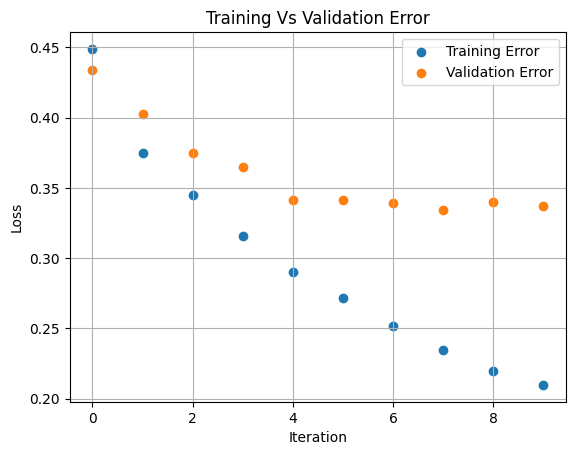

In [65]:
plt.scatter(x=history_for_model2.epoch,y=history_for_model2.history['loss'],label='Training Error')
plt.scatter(x=history_for_model2.epoch,y=history_for_model2.history['val_loss'],label='Validation Error')
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Vs Validation Error')
plt.legend()
plt.show()

In [66]:
# Predicts a binary outcome for each observation
result_for_model_2 = model2.predict(X_test)

11/11 [==============================] - 0s 2ms/step


In [67]:
result_for_model_2[:10]

array([[0.00324761],
       [0.01753775],
       [0.02227321],
       [0.31342795],
       [0.00286367],
       [0.01389651],
       [0.63393927],
       [0.00985083],
       [0.86307263],
       [0.01003289]], dtype=float32)

In [68]:
df_test = pd.read_csv(test_file,names=columns)
df_test['predicted_prob'] = result_for_model_2
df_test['predicted_class'] = np.where(result_for_model_2 > 0.5,1,0)
df_test[['Churn?','predicted_class', 'predicted_prob']].head(10)

,Churn?,predicted_class,predicted_prob
0,0,0,0.003248
1,0,0,0.017538
2,0,0,0.022273
3,0,0,0.313428
4,0,0,0.002864
5,0,0,0.013897
6,1,1,0.633939
7,0,0,0.009851
8,0,1,0.863073
9,0,0,0.010033


In [69]:
cnf_matrix_for_model_2 = confusion_matrix(df_test['Churn?'], df_test['predicted_class'],labels=[1,0])

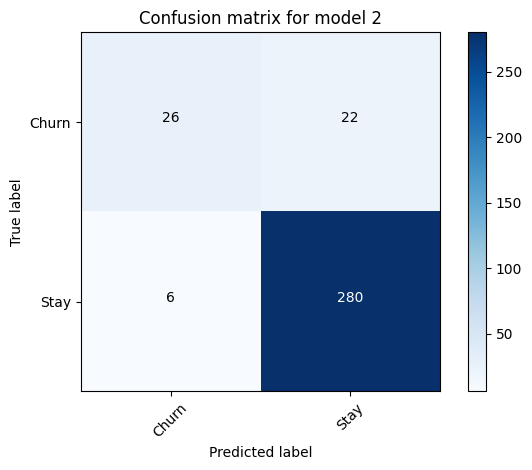

In [70]:
plt.figure()
plot_confusion_matrix(cnf_matrix_for_model_2,classes=['Churn','Stay'],
                      title='Confusion matrix for model 2')

In [71]:
metrics = [binary_classifier_metrics(df_test['Churn?'], df_test['predicted_class'])]
df_metrics=pd.DataFrame.from_dict(metrics)
df_metrics.index = ['Model 2']

In [72]:
df_metrics

,TruePositive,TrueNegative,FalsePositive,FalseNegative,Positive,Negative,Recall,TrueNegativeRate,Precision,Accuracy,FalsePositiveRate,FalseNegativeRate,F1
Model 2,26,280,6,22,48,286,0.541667,0.979021,0.8125,0.916168,0.020979,0.458333,0.65


# Model 3

In [80]:
model3=Sequential()

In [81]:
model3.add(Dense(30, activation='relu', input_dim=X_train.shape[1]))
model3.add(Dense(20, activation='relu', input_dim=X_train.shape[1]))
model3.add(Dense(1, activation='sigmoid'))

model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [82]:
history_for_model_3 = model3.fit(X_train, y_train, epochs=20, batch_size=32,
         validation_data=(X_validation,y_validation),callbacks=[early_stopping])

Epoch 1/20
73/73 [==============================] - 2s 8ms/step - loss: 0.5192 - accuracy: 0.7917 - val_loss: 0.4303 - val_accuracy: 0.8348
Epoch 2/20
73/73 [==============================] - 0s 4ms/step - loss: 0.3678 - accuracy: 0.8607 - val_loss: 0.3973 - val_accuracy: 0.8348
Epoch 3/20
73/73 [==============================] - 0s 4ms/step - loss: 0.3374 - accuracy: 0.8616 - val_loss: 0.3698 - val_accuracy: 0.8378
Epoch 4/20
73/73 [==============================] - 0s 6ms/step - loss: 0.3127 - accuracy: 0.8637 - val_loss: 0.3525 - val_accuracy: 0.8468
Epoch 5/20
73/73 [==============================] - 1s 7ms/step - loss: 0.2888 - accuracy: 0.8757 - val_loss: 0.3439 - val_accuracy: 0.8514
Epoch 6/20
73/73 [==============================] - 0s 5ms/step - loss: 0.2637 - accuracy: 0.8928 - val_loss: 0.3259 - val_accuracy: 0.8694
Epoch 7/20
73/73 [==============================] - 0s 5ms/step - loss: 0.2364 - accuracy: 0.9091 - val_loss: 0.3146 - val_accuracy: 0.8859
Epoch 8/20
73/73 [==

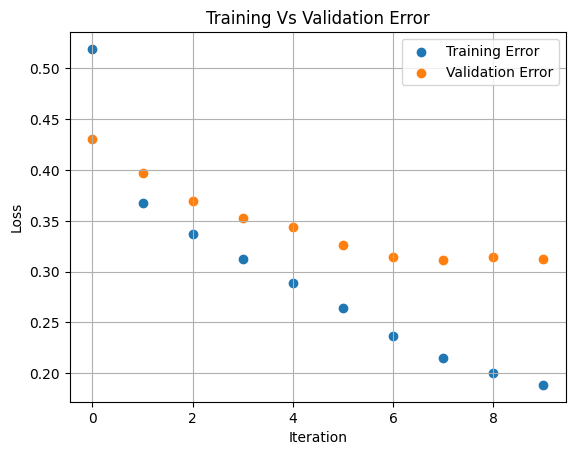

In [84]:
plt.scatter(x=history_for_model_3.epoch,y=history_for_model_3.history['loss'],label='Training Error')
plt.scatter(x=history_for_model_3.epoch,y=history_for_model_3.history['val_loss'],label='Validation Error')
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Vs Validation Error')
plt.legend()
plt.show()

In [87]:
# Predicts a binary outcome for each observation
result_for_model_3 = model.predict(X_test)

11/11 [==============================] - 0s 3ms/step


In [88]:
result_for_model_3[:10]

array([[0.01041991],
       [0.02153568],
       [0.01736726],
       [0.05698793],
       [0.00877691],
       [0.02138076],
       [0.7244609 ],
       [0.02272339],
       [0.7632851 ],
       [0.02073302]], dtype=float32)

In [89]:
df_test = pd.read_csv(test_file,names=columns)
df_test['predicted_prob'] = result_for_model_3
df_test['predicted_class'] = np.where(result_for_model_3 > 0.5,1,0)
df_test[['Churn?','predicted_class', 'predicted_prob']].head(10)

,Churn?,predicted_class,predicted_prob
0,0,0,0.010420
1,0,0,0.021536
2,0,0,0.017367
3,0,0,0.056988
4,0,0,0.008777
5,0,0,0.021381
6,1,1,0.724461
7,0,0,0.022723
8,0,1,0.763285
9,0,0,0.020733


In [90]:
cnf_matrix_for_model_3 = confusion_matrix(df_test['Churn?'], df_test['predicted_class'],labels=[1,0])

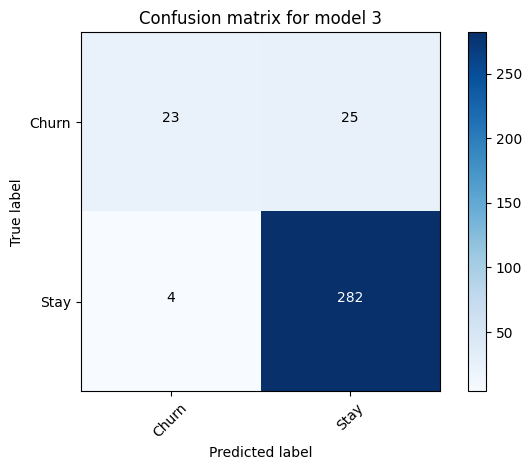

In [91]:
plt.figure()
plot_confusion_matrix(cnf_matrix_for_model_3,classes=['Churn','Stay'],
                      title='Confusion matrix for model 3')

In [92]:
metrics = [binary_classifier_metrics(df_test['Churn?'], df_test['predicted_class'])]
df_metrics=pd.DataFrame.from_dict(metrics)
df_metrics.index = ['Model 3']

In [93]:
df_metrics

,TruePositive,TrueNegative,FalsePositive,FalseNegative,Positive,Negative,Recall,TrueNegativeRate,Precision,Accuracy,FalsePositiveRate,FalseNegativeRate,F1
Model 3,23,282,4,25,48,286,0.479167,0.986014,0.851852,0.913174,0.013986,0.520833,0.613333
